In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

### load results
- for each 

In [2]:
# find the most recent

In [3]:
from pathlib2 import Path
from tfumap.paths import MODEL_DIR

In [4]:
dataset = 'cifar10'

saved_networks = list((MODEL_DIR / 'semisupervised' / dataset).glob('*'))
location_df = pd.DataFrame(columns=['dataset', 'labels_per_class', 'projection_dims', 'umap_prop', 'timestamp', 'location', 'learned_metric'])
for i in saved_networks:
    #print(i.name)
    if len(i.name.split('_')) == 15:
        ds, umap_prop, projection_dims, labels_per_class, _, _, _, y, m, d,h,m,s,f, _ = i.name.split('_')
        timestamp = datetime.strptime('_'.join(i.name.split('_')[-8:-1]), "%Y_%m_%d_%H_%M_%S_%f")
        location_df.loc[len(location_df)] = [ds, labels_per_class, projection_dims, umap_prop, timestamp, i, False]
    elif ('learned-metric_augmented' in i.name) & (len(i.name.split('_')) == 17):
        ds, umap_prop, projection_dims, labels_per_class, _, _, _, y, m, d,h,m,s,f, _, _, _ = i.name.split('_')
        timestamp = datetime.strptime('_'.join(i.name.split('_')[-10:-3]), "%Y_%m_%d_%H_%M_%S_%f")
        location_df.loc[len(location_df)] = [ds, labels_per_class, projection_dims, umap_prop, timestamp, i, True]
    else:
        print(i)
location_df  

/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised/cifar10/cifar10_0.0_1024_full____2020_07_31_11_58_12_513181
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised/cifar10/cifar10_0.0_1024_1____2020_07_31_11_58_46_973815
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised/cifar10/cifar10_1.0_1024_64____2020_08_05_15_23_35_058856__learned-metric
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised/cifar10/cifar10_0.0_1024_4____2020_07_31_17_09_45_295605
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised/cifar10/cifar10_1.0_1024_64____2020_08_05_15_07_44_177373__learned-metric
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised/cifar10/cifar10_1.0_1024_64____2020_08_05_22_36_39_898520__learned-metric
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised/cifar10/cifar10_1.0_1024_64____2020_08_06_10

,dataset,labels_per_class,projection_dims,umap_prop,timestamp,location,learned_metric
0,cifar10,16,1024,1.0,2020-08-01 17:41:08.854427,/mnt/cube/tsainbur/Projects/github_repos/umap_...,False
1,cifar10,1,1024,0.0,2020-08-01 17:13:01.516326,/mnt/cube/tsainbur/Projects/github_repos/umap_...,False
2,cifar10,1024,1024,0.0,2020-07-31 23:46:05.691262,/mnt/cube/tsainbur/Projects/github_repos/umap_...,False
3,cifar10,64,1024,1.0,2020-08-06 00:52:19.004996,/mnt/cube/tsainbur/Projects/github_repos/umap_...,True
4,cifar10,1,1024,1.0,2020-08-01 17:50:08.786179,/mnt/cube/tsainbur/Projects/github_repos/umap_...,False
5,cifar10,4,1024,1.0,2020-08-01 17:37:09.358973,/mnt/cube/tsainbur/Projects/github_repos/umap_...,False
6,cifar10,4,1024,0.0,2020-07-31 23:46:05.373274,/mnt/cube/tsainbur/Projects/github_repos/umap_...,False
7,cifar10,16,1024,1.0,2020-08-06 16:02:29.622118,/mnt/cube/tsainbur/Projects/github_repos/umap_...,True
8,cifar10,4,1024,1.0,2020-08-06 15:59:01.968264,/mnt/cube/tsainbur/Projects/github_repos/umap_...,True
9,cifar10,64,1024,1.0,2020-08-05 22:37:37.310401,/mnt/cube/tsainbur/Projects/github_repos/umap_...,True


In [5]:
i.name.split('_')

['cifar10',
 '0.0',
 '1024',
 'full',
 '',
 '',
 '',
 '2020',
 '07',
 '31',
 '23',
 '38',
 '50',
 '878911',
 'augmented']

In [6]:
location_df[location_df.learned_metric == 'True']

,dataset,labels_per_class,projection_dims,umap_prop,timestamp,location,learned_metric


#### grab the relavent results

In [7]:
dataset = 'cifar10'

label_sizes = [1, 4, 16, 64, 256, 1024]
projection_dims = 1024
umap_prop_list = [0.0, 1.0]
learned_metric_list = [True, False]

In [8]:
results_df = pd.DataFrame(columns = ['labels_per_class', 'accuracy', 'umap_prop', 'timestamp', 'learned_metric'])
for nex in label_sizes:
    for umap_prop in umap_prop_list:
        for learned_metric in learned_metric_list:
            subset_df = location_df[
                (location_df.dataset == dataset) & 
                (location_df.labels_per_class == str(nex)) & 
                (location_df.projection_dims == str(projection_dims)) & 
                (location_df.umap_prop == str(umap_prop) ) &
                (location_df.learned_metric.values == learned_metric ) 
            ]

            for idx, row in subset_df.sort_values(by='timestamp', ascending=False).iterrows():
                acc_list = list(row.location.glob('test_acc.npy'))
                if len(acc_list)> 0:
                    acc = np.load(acc_list[0])
                    acc = np.mean(acc)
                    results_df.loc[len(results_df)] = [nex, acc, umap_prop, row.timestamp, row.learned_metric]
                    break


In [9]:
results_df

,labels_per_class,accuracy,umap_prop,timestamp,learned_metric
0,1,0.1536,0.0,2020-08-01 17:21:58.145193,False
1,1,0.1022,1.0,2020-08-06 21:42:37.899879,True
2,1,0.0950,1.0,2020-08-01 17:50:08.786179,False
3,4,0.2403,0.0,2020-07-31 23:52:05.128917,False
4,4,0.2342,1.0,2020-08-06 15:59:01.968264,True
5,4,0.2266,1.0,2020-08-01 17:37:09.358973,False
6,16,0.3122,0.0,2020-08-01 08:39:25.604093,False
7,16,0.3363,1.0,2020-08-07 08:46:10.018839,True
8,16,0.3243,1.0,2020-08-01 17:41:08.854427,False
9,64,0.4087,0.0,2020-08-01 08:39:45.034762,False


In [10]:
import seaborn as sns

In [11]:
 results_df[results_df.umap_prop == '0.0']

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,labels_per_class,accuracy,umap_prop,timestamp,learned_metric


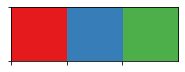

In [26]:
pal = sns.color_palette('Set1',3)
sns.palplot(pal)

In [27]:
from tfumap.paths import DATA_DIR, FIGURE_DIR, ensure_dir, save_fig

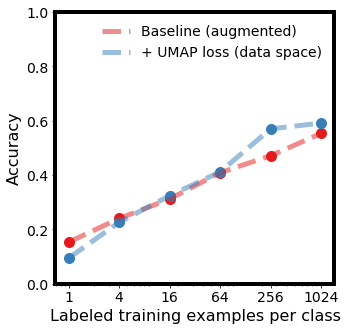

In [28]:
fig, ax = plt.subplots(figsize=(5,5))


#


color = pal[0]
mask = (results_df.umap_prop == 0.0) & (results_df.learned_metric == False)
nex = results_df[mask].labels_per_class.values.astype('int')
acc = results_df[mask].accuracy.values
ax.scatter(nex, acc, color=color, s=100)
ax.plot(nex, acc, linewidth = 5, alpha = 0.5, ls = 'dashed', color=color, label = 'Baseline (augmented)')

color = pal[1]
mask = (results_df.umap_prop == 1.0) & (results_df.learned_metric == False)
nex = results_df[mask].labels_per_class.values.astype('int')
acc = results_df[mask].accuracy.values
ax.scatter(nex, acc, color=color, s=100)
ax.plot(nex, acc, linewidth = 5, alpha = 0.5, ls = 'dashed', color=color, label = '+ UMAP loss (data space)')

ax.set_xscale('log')
ax.set_ylim([0,1])
ax.set_xticks(nex)
ax.set_xticklabels([str(i) for i in nex]);
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Labeled training examples per class', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
[i.set_linewidth(4) for i in ax.spines.values()];
leg = ax.legend(fontsize=14)
leg.get_frame().set_linewidth(0.0)
#save_fig(FIGURE_DIR/'cifar10_semisupervised-augmented-umap', save_pdf=True)

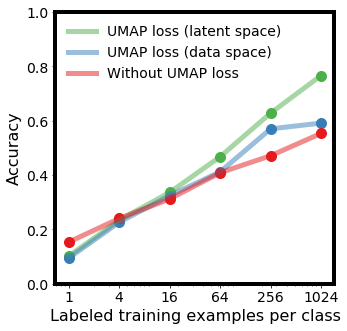

In [15]:
fig, ax = plt.subplots(figsize=(5,5))


color = pal[2]
mask = (results_df.umap_prop == 1.0) & (results_df.learned_metric == True)
nex = results_df[mask].labels_per_class.values.astype('int')
acc = results_df[mask].accuracy.values
ax.scatter(nex, acc, color=color, s=100)
ax.plot(nex, acc, linewidth = 5, alpha = 0.5, color=color, label = 'UMAP loss (latent space)')

#
color = pal[1]
mask = (results_df.umap_prop == 1.0) & (results_df.learned_metric == False)
nex = results_df[mask].labels_per_class.values.astype('int')
acc = results_df[mask].accuracy.values
ax.scatter(nex, acc, color=color, s=100)
ax.plot(nex, acc, linewidth = 5, alpha = 0.5, color=color, label = 'UMAP loss (data space)')

color = pal[0]
mask = (results_df.umap_prop == 0.0) & (results_df.learned_metric == False)
nex = results_df[mask].labels_per_class.values.astype('int')
acc = results_df[mask].accuracy.values
ax.scatter(nex, acc, color=color, s=100)
ax.plot(nex, acc, linewidth = 5, alpha = 0.5, color=color, label = 'Without UMAP loss')

ax.set_xscale('log')
ax.set_ylim([0,1])
ax.set_xticks(nex)
ax.set_xticklabels([str(i) for i in nex]);
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Labeled training examples per class', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
[i.set_linewidth(4) for i in ax.spines.values()];
leg = ax.legend(fontsize=14)
leg.get_frame().set_linewidth(0.0)
save_fig(FIGURE_DIR/'cifar10_semisupervised-augmented-latent-umap-all', save_pdf=True)

In [16]:
### plot results 

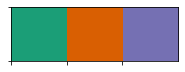

In [21]:
pal2 = sns.color_palette('Dark2',3)
sns.palplot(pal2)

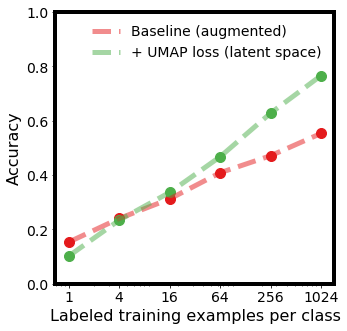

In [24]:
fig, ax = plt.subplots(figsize=(5,5))



color = pal[0]
mask = (results_df.umap_prop == 0.0) & (results_df.learned_metric == False)
nex = results_df[mask].labels_per_class.values.astype('int')
acc = results_df[mask].accuracy.values
ax.scatter(nex, acc, color=color, s=100)
ax.plot(nex, acc, linewidth = 5, alpha = 0.5, color=color, ls='dashed', label = 'Baseline (augmented)')

color = pal[2]
mask = (results_df.umap_prop == 1.0) & (results_df.learned_metric == True)
nex = results_df[mask].labels_per_class.values.astype('int')
acc = results_df[mask].accuracy.values
ax.scatter(nex, acc, color=color, s=100)
ax.plot(nex, acc, linewidth = 5, alpha = 0.5, color=color, ls='dashed', label = '+ UMAP loss (latent space)')

ax.set_xscale('log')
ax.set_ylim([0,1])
ax.set_xticks(nex)
ax.set_xticklabels([str(i) for i in nex]);
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Labeled training examples per class', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
[i.set_linewidth(4) for i in ax.spines.values()];
leg = ax.legend(fontsize=14)
leg.get_frame().set_linewidth(0.0)
save_fig(FIGURE_DIR/'cifar10_semisupervised-augmented-latent-umap', save_pdf=True)